In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from tqdm.notebook import tqdm #useful module for progress bars
import logging
import gc
from datetime import datetime



(224, 224, 3)


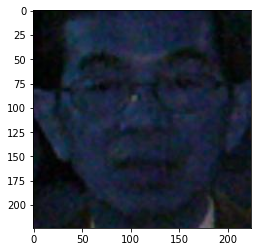

In [3]:
#betölti az összes képet a train és val mappákból is a break az megállítja az első képnél és ki is printeli
#loads all of the pictures from the train and val folders. The break stops at the first image
directory="." #gets the current working directory
datasets=["train", "val"]

for dataset in datasets:
    path=os.path.join(directory, dataset)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img)) #for some reason my cv2 could not imread
        plt.imshow(img_array)
        print(img_array.shape)
        
        break
    break

<function matplotlib.pyplot.show>

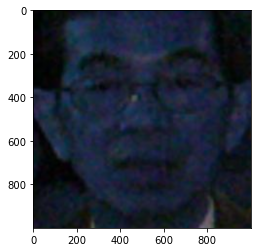

In [4]:
#pixelek számának módosítása
img_size=1000
new_array=cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array)
plt.show


In [ ]:
dir_ect=os.path.join(directory, "train")
#egy gyors függvény ami betölti az összes képet egy bizonyos mappából amit megadsz
#quick function for loading all of the images from a given folder
def load_all_images(directory):
    images = []
    for filename in tqdm(os.listdir(directory)):
        img = cv2.imread(os.path.join(directory,filename))
        if img is not None:
            images.append(img)
    return images

images = load_all_images(dir_ect)       
print(len(images))

In [21]:

#egy gyors függvény ami betölti az összes képet egy bizonyos mappából amit megadsz
#quick function for loading all of the images from a given folder
def load_all_images(directory, img_size = False, range_from = 0, range_to = 1):
    filenames = os.listdir(directory)
    num = len(filenames)
    resize = True
    if(not img_size):
        img = cv2.imread(os.path.join(directory,filenames[0]))
        img_size = img.shape[0]
        resize = False
    #For memory sizes this big dinamyc arrays (lists) are not an effective way to reserve memory
    #Hence numpy arrays are utalized
    print(f"{int(num*(range_to-range_from))} files to be loaded")
    start = int(num*range_from)
    images = np.zeros(shape=(int(num*(range_to-range_from)), img_size, img_size, 3), dtype=np.float16)
    w = 100
    num_none = 0
    for i in tqdm(range(int(images.shape[0]))):
        img = cv2.imread(os.path.join(directory,filenames[i+start]))
        if img is not None:

            if(resize):
                images[i, ...] = cv2.resize(img, (img_size, img_size))
            else:
                images[i, ...] = img
            '''
            w-=1
            if(__debug__ and w==0):
                break
        else:
            num_none +=1
'''
    if(num_none>0):
        print(f"{num_none} images were unable to load, or not valid image types")
    return images

gc.collect()
np.savez("train_128x128_2_of_4.npz", train=load_all_images(os.path.join(directory, "train"),
img_size=128,
range_from=0.25,
 range_to=0.5)
 )
gc.collect()
np.savez("train_128x128_3_of_4.npz", train=load_all_images(os.path.join(directory, "train"),
img_size=128,
range_from=0.5,
 range_to=0.75)
 )
gc.collect()
np.savez("train_128x128_4_of_4.npz", train=load_all_images(os.path.join(directory, "train"),
img_size=128,
range_from=0.75,
 range_to=1)
 )
gc.collect()
np.savez("val_128x128.npz", val=load_all_images(os.path.join(directory, "val"),
img_size=128)
 )

21686 files to be loaded


  0%|          | 0/21686 [00:00<?, ?it/s]

21686 files to be loaded


  0%|          | 0/21686 [00:00<?, ?it/s]

21686 files to be loaded


  0%|          | 0/21686 [00:00<?, ?it/s]

10954 files to be loaded


  0%|          | 0/10954 [00:00<?, ?it/s]

In [38]:
now = datetime.now()
this_data = np.load("train_128x128_1_of_4.npz")["train"]
print(datetime.now()-now)

0:00:56.560568


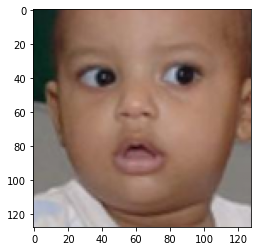

In [39]:
plt.imshow((this_data[10000][:, :, ::-1]).astype(float)/255.0)
plt.show()